# Inferences : 
0. People with No depression are 4 times more than people with.
1. 'Name' column should not affect the 'Depression' column.
2. There are 2 genders. Male are slightly more than Female
3. Ages 18-22 have highest depression, 22-34 have moderate depression and there 35-60 have very       less to no depression.
4. Age generally follows uniform distribution. Depression hue curve is right skewed and Non            depression curve is left skewed.
5. City < 500 make upto only 0.1% of the data.
6. There are more Working Professionals than Students. Working Professionals have very less           depression rate and students have seen to have slightly more depression rate.
7. Profession column NaN is mostly students and needs to be filled with it. Other professions are     also present (Working Professionals).
8. Higher the Academic Pressure, higher the depression rate.
9. There is No Significant effect of work pressure on Depression.
10. CGPA has no significant effect on Depression. Both follows Normal Distribution.
11. Higher the study satisfaction, lesser the chances of Depression.
12. No significant relation of Job Satisfaction with Depression.
13. No significant effect of Sleep Duration with Depression. Uniformly distributed.
14. There are more depression people in unhealthy diet, then in moderate and then in healthy.
15. Once try with and without degree column.
16. Higher rates of Depression in people who had Suicidal thoughts than people who dont.
17. More the study/working hours, more the depression chances.
18. Higher the finanical stress, higher the chances of depression chances.

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, f1_score
import optuna
from tqdm import tqdm

In [252]:
data = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv').set_index('id')
data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## NaN Values

In [253]:
print("Column Names and NaN values in %\n")
for col in data.columns:
    print(f"{col} : {data[col].isna().sum()/len(data)*100:.2f} %")

Column Names and NaN values in %

Name : 0.00 %
Gender : 0.00 %
Age : 0.00 %
City : 0.00 %
Working Professional or Student : 0.00 %
Profession : 26.03 %
Academic Pressure : 80.17 %
Work Pressure : 19.84 %
CGPA : 80.17 %
Study Satisfaction : 80.17 %
Job Satisfaction : 19.84 %
Sleep Duration : 0.00 %
Dietary Habits : 0.00 %
Degree : 0.00 %
Have you ever had suicidal thoughts ? : 0.00 %
Work/Study Hours : 0.00 %
Financial Stress : 0.00 %
Family History of Mental Illness : 0.00 %
Depression : 0.00 %


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  float

In [255]:
data.duplicated().sum()

0

In [256]:
data['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

# Column Wise Analysis

## Name column

In [257]:
data['Name'].value_counts()

Name
Rohan       3178
Aarav       2336
Rupak       2176
Aaradhya    2045
Anvi        2035
            ... 
Anhil          1
Rieta          1
Zahra          1
Jathesh        1
Aarun          1
Name: count, Length: 422, dtype: int64

In [258]:
data[data['Name']=='Arya'][:5]

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
284,Arya,Male,42.0,Agra,Working Professional,NaN,NaN,5.0,NaN,NaN,2.0,7-8 hours,Unhealthy,Class 12,Yes,6.0,3.0,Yes,1
948,Arya,Male,42.0,Agra,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,More than 8 hours,Unhealthy,Class 12,No,0.0,4.0,No,0
1478,Arya,Male,29.0,Ghaziabad,Working Professional,Doctor,NaN,1.0,NaN,NaN,5.0,5-6 hours,Moderate,B.Pharm,Yes,12.0,3.0,Yes,1
2850,Arya,Male,29.0,Ghaziabad,Student,NaN,5.0,NaN,9.89,3.0,NaN,7-8 hours,Moderate,BCA,Yes,12.0,3.0,Yes,1
3377,Arya,Male,28.0,Kalyan,Student,NaN,2.0,NaN,5.10,1.0,NaN,Less than 5 hours,Healthy,BCA,Yes,9.0,3.0,No,0


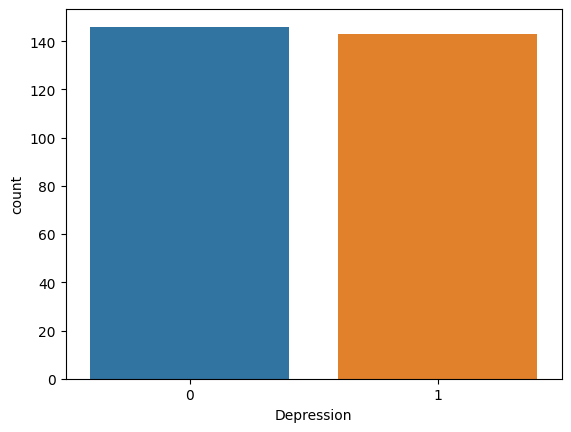

In [259]:
# sns.countplot(data[data['Name'] == 'Rohan']['Depression'])
sns.countplot(data = data[data['Name'] == 'Arya'], x='Depression');
# sns.countplot(data = data[data['Name'] == 'Ayush'], x='Depression');

In [260]:
# As far as I can think logically, the names cannot be related to the state of depression in anyone.
# So I will drop this column.

## Gender column

In [261]:
data['Gender']

id
0         Female
1           Male
2           Male
3           Male
4         Female
           ...  
140695    Female
140696    Female
140697    Female
140698    Female
140699      Male
Name: Gender, Length: 140700, dtype: object

In [262]:
data['Gender'].value_counts()

Gender
Male      77464
Female    63236
Name: count, dtype: int64

In [263]:
data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


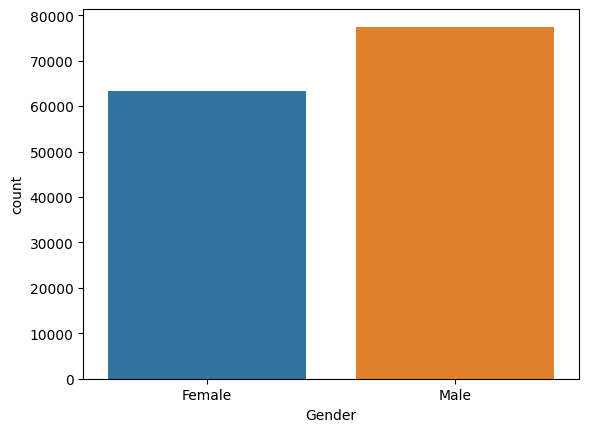

In [264]:
sns.countplot(data=data, x='Gender');

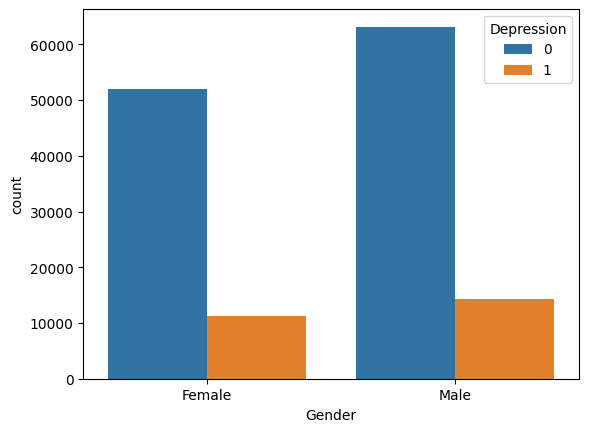

In [265]:
sns.countplot(data=data, x = 'Gender', hue='Depression');

In [266]:
data['Gender'].isna().sum()

0

## Age column

In [267]:
data['Age'].value_counts()

Age
56.0    5246
49.0    5099
38.0    4564
53.0    4526
57.0    4395
47.0    4199
46.0    4080
54.0    3928
51.0    3927
18.0    3921
43.0    3856
59.0    3781
48.0    3695
45.0    3535
20.0    3515
50.0    3439
42.0    3393
24.0    3355
28.0    3338
39.0    3262
44.0    3217
41.0    3140
33.0    3140
29.0    3097
40.0    3094
58.0    2932
25.0    2931
23.0    2900
55.0    2846
35.0    2834
21.0    2742
37.0    2724
36.0    2703
19.0    2634
27.0    2613
52.0    2589
34.0    2578
31.0    2560
60.0    2501
26.0    2108
22.0    2066
30.0    1912
32.0    1785
Name: count, dtype: int64

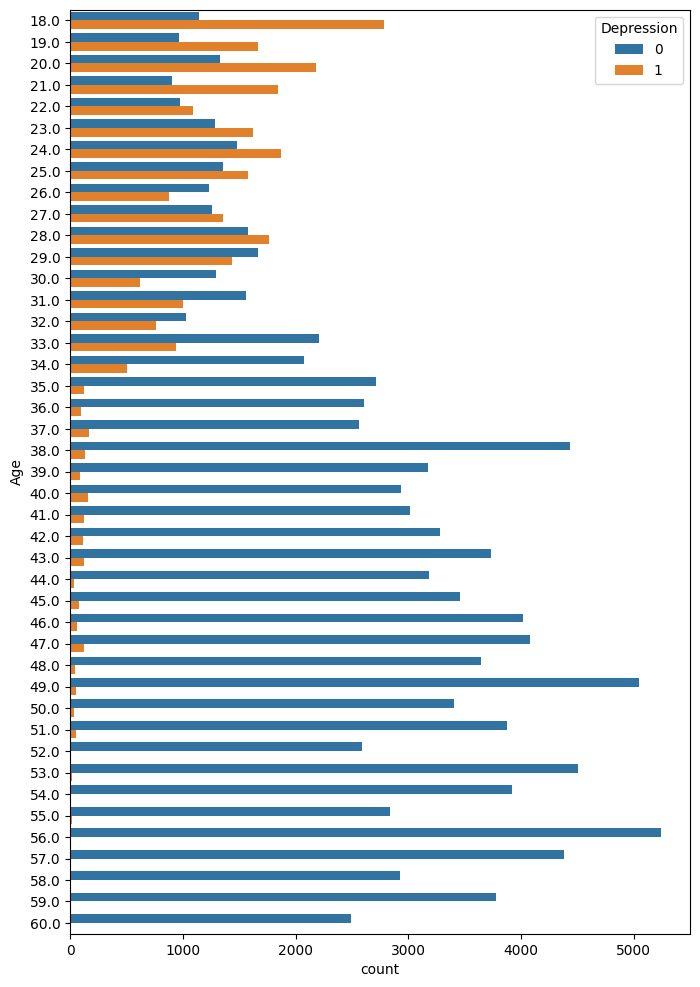

In [268]:
plt.figure(figsize=(8, 12))
sns.countplot(data=data, y='Age', hue='Depression');

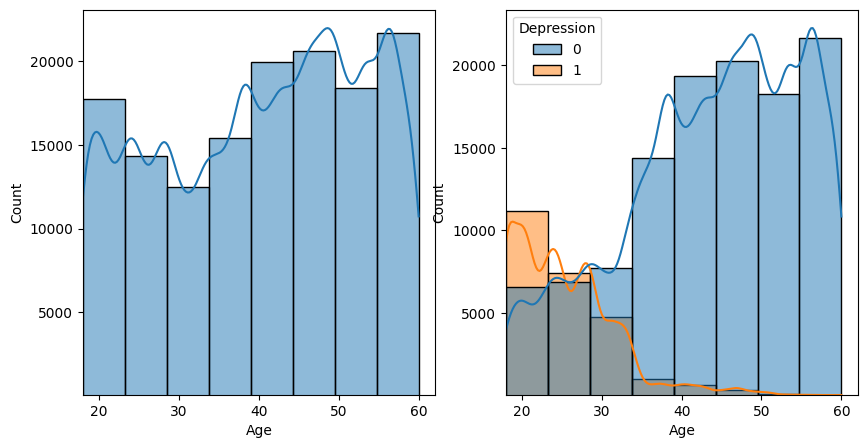

In [269]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Age', bins=8, kde=True);
plt.xlim(18)
plt.ylim(60);

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='Age', bins=8, hue='Depression',kde=True);
plt.xlim(18)
plt.ylim(60);

In [270]:
data['Age'].isna().sum()

0

## City Column

In [271]:
data['City'].value_counts()

City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

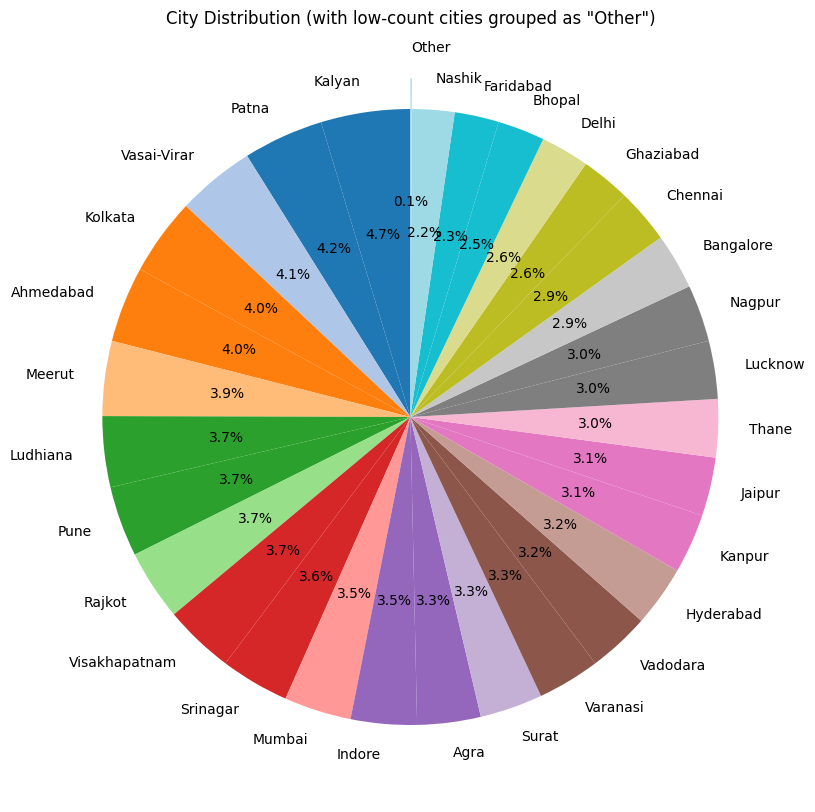

In [272]:
import matplotlib.pyplot as plt

city_counts = data['City'].value_counts()

city_counts_over_500 = city_counts[city_counts >= 500]
other_count = city_counts[city_counts < 500].sum()

city_counts_over_500['Other'] = other_count

explode = [0.1 if label == 'Other' else 0 for label in city_counts_over_500.index]

# Plot the pie chart
plt.figure(figsize=(10, 10))
city_counts_over_500.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', explode=explode)
plt.ylabel('')
plt.title('City Distribution (with low-count cities grouped as "Other")')
plt.show()

In [273]:
data['City'].isna().sum()

0

## Working Professional or Student Column

In [274]:
data['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

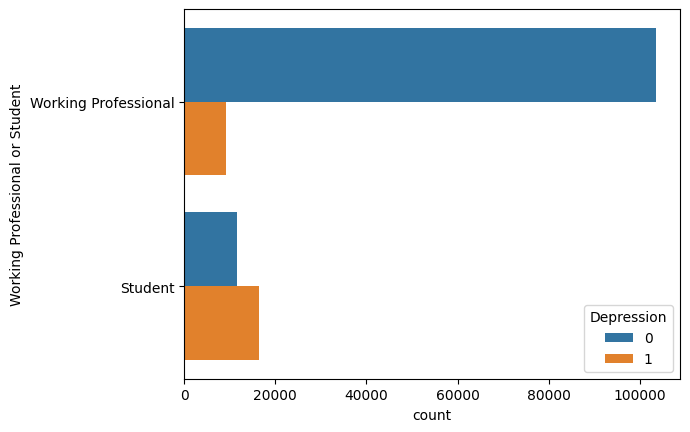

In [275]:
sns.countplot(data=data, y='Working Professional or Student', hue='Depression');

In [276]:
data['Working Professional or Student'].isna().sum()

0

## Profession Column

In [277]:
data[data['Profession'].isna()]

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140686,Rohan,Male,27.0,Ludhiana,Student,NaN,2.0,NaN,9.40,3.0,NaN,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,Ayaan,Male,31.0,Faridabad,Student,NaN,3.0,NaN,6.61,4.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
140690,Rashi,Female,18.0,Ludhiana,Student,NaN,5.0,NaN,6.88,2.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [278]:
data[data['Profession'].isna()]['Working Professional or Student'].value_counts()

Working Professional or Student
Student                 27867
Working Professional     8763
Name: count, dtype: int64

In [279]:
# Fill the NaN values of Profession :
# If Working Professional or Student is Student --> Student
# If Working Professional or Student is Working Professional --> Working Professional

In [280]:
counts = data['Profession'].value_counts()
counts[counts>100]

Profession
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 1339
Finanancial Analyst        13

In [281]:
# Profession column value counts if < 200 should be replaced with 'Other'

## Academic Pressure Column

In [282]:
data[data['Academic Pressure'].isna()]['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112794
Student                      9
Name: count, dtype: int64

In [283]:
data[~data['Academic Pressure'].isna()]['Working Professional or Student'].value_counts()

Working Professional or Student
Student                 27892
Working Professional        5
Name: count, dtype: int64

In [284]:
# Academic Pressure is seen in Students only.
# We can either drop 9 students or use mode imputation.
# Drop Working Professional having Academic Pressure.

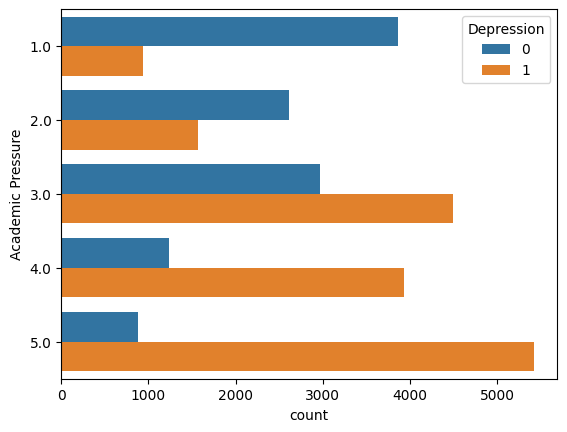

In [285]:
sns.countplot(data=data, y='Academic Pressure', hue='Depression');

## Work Pressure Column

In [286]:
data[data['Work Pressure'].isna()]['Working Professional or Student'].value_counts()

Working Professional or Student
Student                 27898
Working Professional       20
Name: count, dtype: int64

In [287]:
data[~data['Work Pressure'].isna()]['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112779
Student                      3
Name: count, dtype: int64

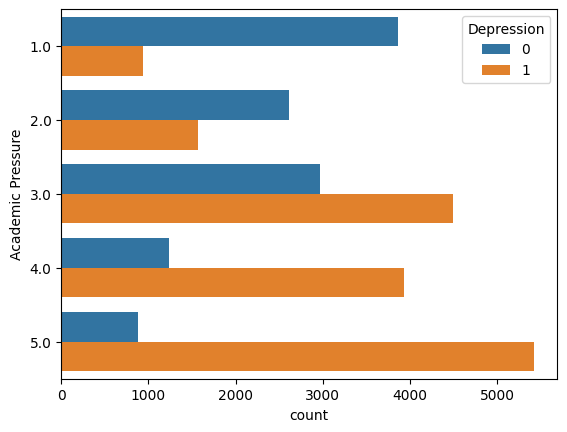

In [288]:
sns.countplot(data=data, y='Academic Pressure', hue='Depression');

In [289]:
# Startegy
# Make a new column Pressure :
# Add Work Pressure and Academic Pressure and drop the rows with pressure > 5.0

## CGPA Column

In [290]:
data[data['CGPA'].isna()]['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112793
Student                      9
Name: count, dtype: int64

In [291]:
data[~data['CGPA'].isna()]['Working Professional or Student'].value_counts()

Working Professional or Student
Student                 27892
Working Professional        6
Name: count, dtype: int64

In [292]:
# Drop Working Professionals with CGPA and Impute average CGPA to students with NaN in CGPA.

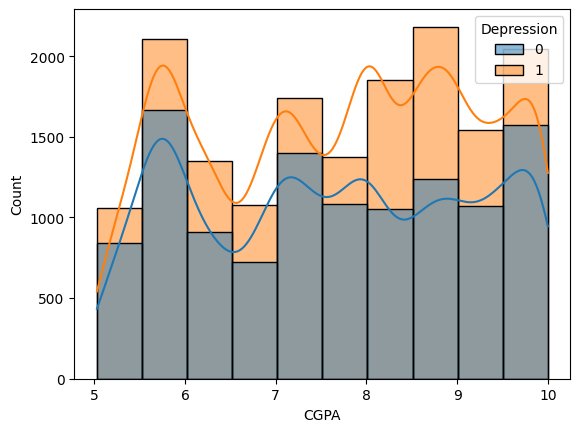

In [293]:
sns.histplot(data=data, x='CGPA', hue='Depression', bins=10, kde=True);

In [294]:
# CGPA has no significant effect on Depression.
# Both 0 and 1 follows normal distribution.

In [295]:
data['CGPA'].isna().sum()

112802

## Study Satisfaction column

In [296]:
data['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    6360
2.0    5840
3.0    5823
1.0    5451
5.0    4423
Name: count, dtype: int64

In [297]:
data[data['Study Satisfaction'].isna()]['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112793
Student                     10
Name: count, dtype: int64

In [298]:
data[~data['Study Satisfaction'].isna()]['Working Professional or Student'].value_counts()

Working Professional or Student
Student                 27891
Working Professional        6
Name: count, dtype: int64

In [299]:
# Study Satisfaction is seen among Students.

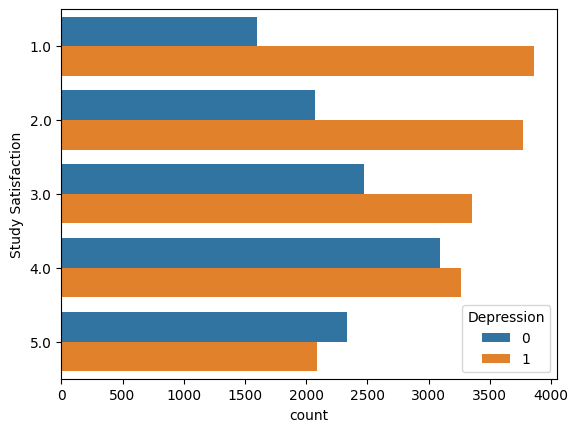

In [300]:
sns.countplot(data=data, y='Study Satisfaction', hue='Depression');

In [301]:
# Higher the study satisfaction, lesser the chances of Depression
# Lesser the study satisfaction, more the chances of Depression

## Job Satisfaction Column

In [302]:
data['Job Satisfaction'].value_counts()

Job Satisfaction
2.0    24783
5.0    22812
1.0    22324
3.0    21951
4.0    20920
Name: count, dtype: int64

In [303]:
data[data['Job Satisfaction'].isna()]['Working Professional or Student'].value_counts()

Working Professional or Student
Student                 27893
Working Professional       17
Name: count, dtype: int64

In [304]:
data[~data['Job Satisfaction'].isna()]['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112782
Student                      8
Name: count, dtype: int64

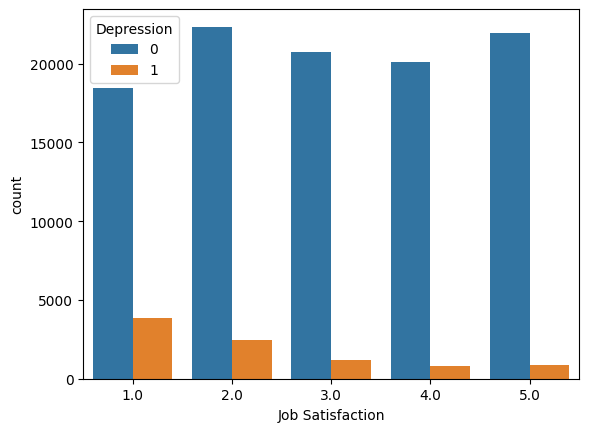

In [305]:
sns.countplot(data=data, x='Job Satisfaction', hue='Depression');

In [306]:
# Drop the students having some data in job satisfaction.
# Impute the missing data in job satisfaction for working professionals with the mode value

In [307]:
# Strategy : 
# Make a new column 'Satisfaction'
# Add Job Satisfaction and Study Satisfaction and drop the rows with Satisfaction > 5.0
# Impute the remaining NaN values in Satisfaction with mode.

## Sleep Duration Column

In [308]:
data['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

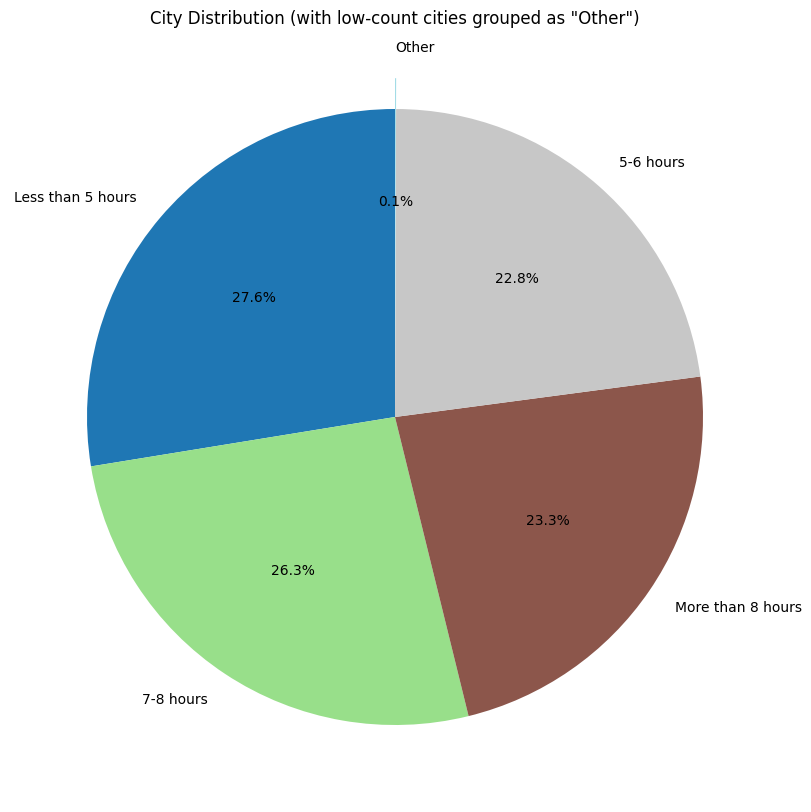

In [309]:
counts = data['Sleep Duration'].value_counts()
sleep_counts_over_500 = counts[counts >= 500]
other_count = counts[counts < 500].sum()

sleep_counts_over_500['Other'] = other_count

explode = [0.1 if label == 'Other' else 0 for label in sleep_counts_over_500.index]

# Plot the pie chart
plt.figure(figsize=(10, 10))
sleep_counts_over_500.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', explode=explode)
plt.ylabel('')
plt.title('City Distribution (with low-count cities grouped as "Other")')
plt.show()

In [310]:
# Replace the sleep hours with value counts less than 500 with 'Other'

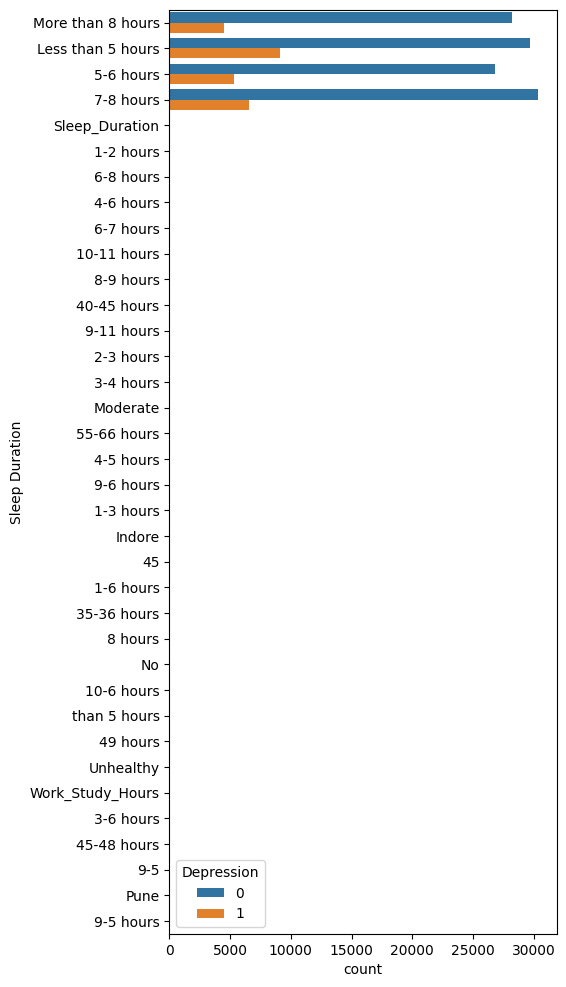

In [311]:
plt.figure(figsize=(5, 12))
sns.countplot(data=data, y='Sleep Duration', hue='Depression');

In [312]:
# No significant effect of sleep duration with Depression
# Uniform Distribution

In [313]:
data['Sleep Duration'].isna().sum()

0

## Dietary habits Column

In [314]:
data['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

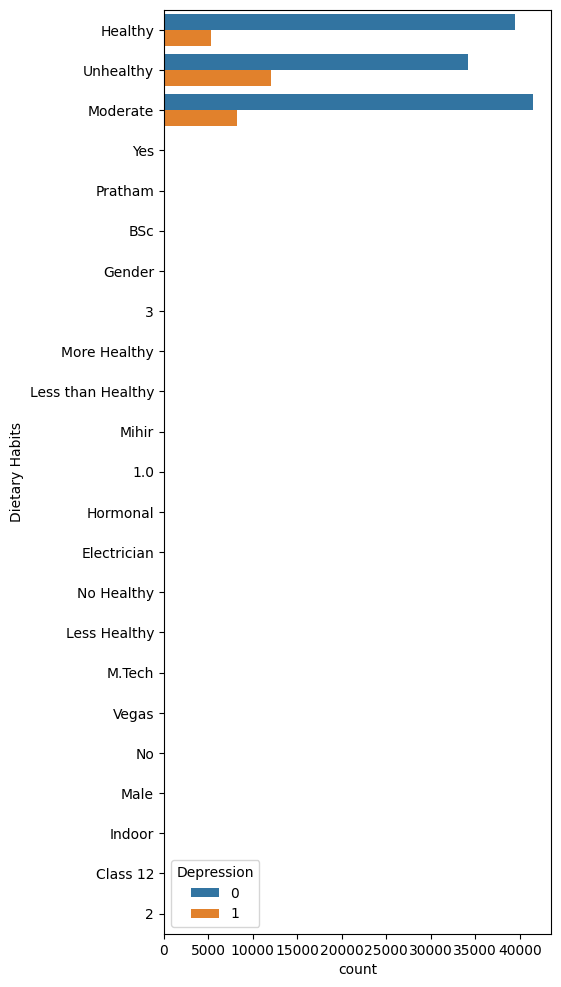

In [315]:
plt.figure(figsize=(5, 12))
sns.countplot(data=data, y='Dietary Habits', hue='Depression');

In [316]:
# There are more depression people in unhealthy diet, then in moderate and then in healthy.
# No depression looks almost similar

In [317]:
# Replace all other columns than Healthy, Unhealthy and Moderate diet with Moderate.

## Degree column

In [318]:
counts = data['Degree'].value_counts()
# counts
counts[counts>500]

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
BCA          5739
M.Ed         5668
MCA          5234
BBA          5030
BSc          5027
MSc          4879
LLM          4647
M.Pharm      4537
M.Tech       4475
B.Tech       4425
LLB          4348
BHM          4305
MBA          3818
BA           3750
ME           3632
MD           3383
MHM          3286
BE           3104
PhD          3103
M.Com        3094
MBBS         3082
MA           2887
Name: count, dtype: int64

In [319]:
# Replace the Degree of value counts < 2500 with 'Other'

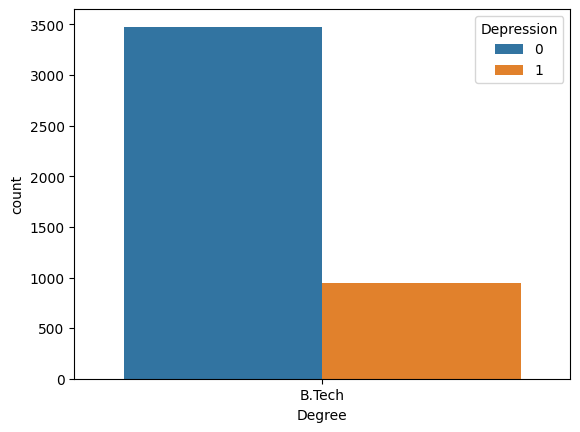

In [320]:
sns.countplot(x=data[data['Degree']=='B.Tech']['Degree'], hue=data['Depression']);

In [321]:
# Degree subtype vs depression
# Class 12 have similar number of Depression and Non Depression
# B.Ed have less depression

# Similar analysis for others too....

In [322]:
data['Degree'].isna().sum()

2

In [323]:
# Dietary habits and degree should have mode imputation.

## Have you ever had suicidal thoughts ? column

In [324]:
data['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
No     71138
Yes    69562
Name: count, dtype: int64

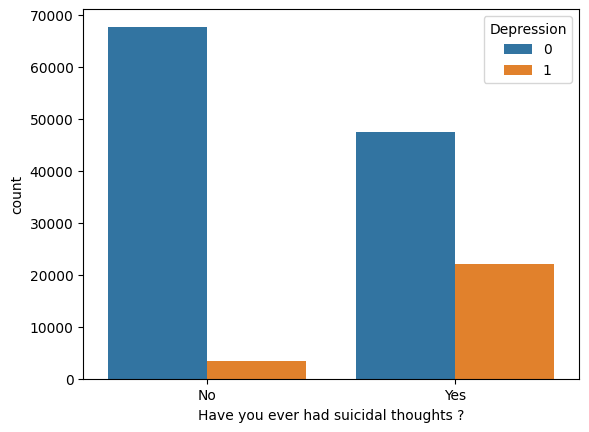

In [325]:
sns.countplot(data=data, x='Have you ever had suicidal thoughts ?', hue='Depression');

In [326]:
data['Have you ever had suicidal thoughts ?'].isna().sum()

0

In [327]:
# Higher rates of Depression in people who had Suicidal thoughts than people who dont.

## Work/Study Hours column

In [328]:
data['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    14199
11.0    12832
9.0     12711
0.0     12066
12.0    11409
2.0     10595
6.0     10432
7.0      9872
1.0      9802
3.0      9474
5.0      9337
4.0      9065
8.0      8906
Name: count, dtype: int64

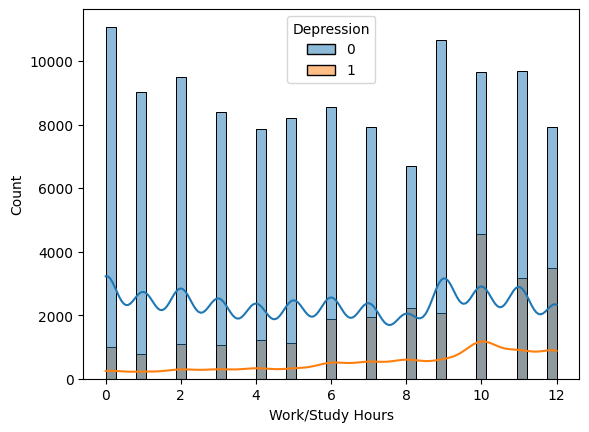

In [329]:
sns.histplot(data=data, x='Work/Study Hours', hue='Depression',kde=True);

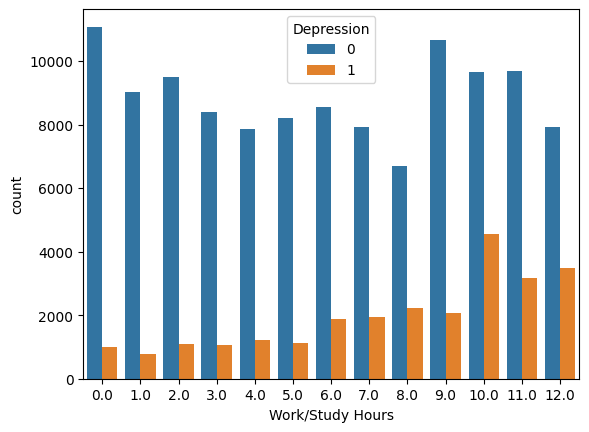

In [330]:
sns.countplot(data=data, x='Work/Study Hours', hue='Depression');

In [331]:
# More the study/working hours, more the depression chances.

In [332]:
data['Work/Study Hours'].isna().sum()

0

## Financial Stress column

In [333]:
data['Financial Stress'].value_counts()

Financial Stress
2.0    31451
5.0    28279
4.0    27765
1.0    27211
3.0    25990
Name: count, dtype: int64

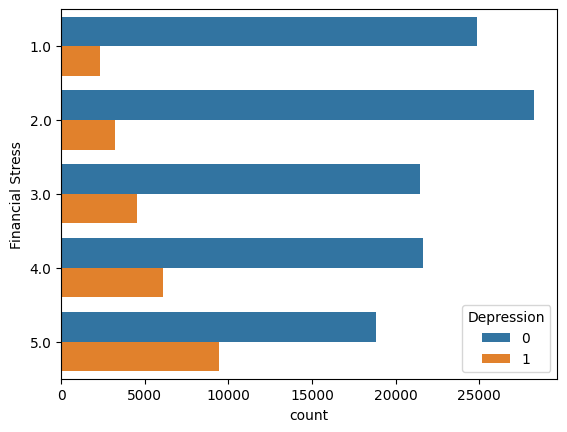

In [334]:
sns.countplot(data=data, y='Financial Stress', hue='Depression');

In [335]:
# Higher the finanical stress, higher the chances of depression chances.

In [336]:
data['Financial Stress'].isna().sum()

4

In [337]:
# Mode Imputation in place of NaN values in Financial Stress column

## Family History of Mental Illness

In [338]:
data['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     70758
Yes    69942
Name: count, dtype: int64

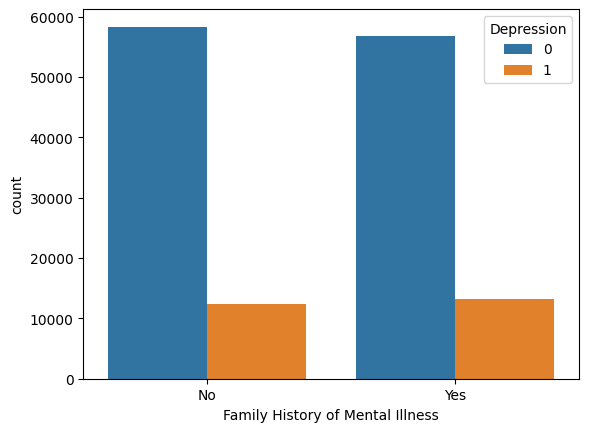

In [339]:
sns.countplot(data=data, x='Family History of Mental Illness', hue='Depression');

In [340]:
# No significant effect of Family History of Mental Illness on Depression column. 
# Both nearly Yeild same results.

In [341]:
data['Family History of Mental Illness'].isna().sum()

0

# Bivariate Analysis

In [342]:
data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


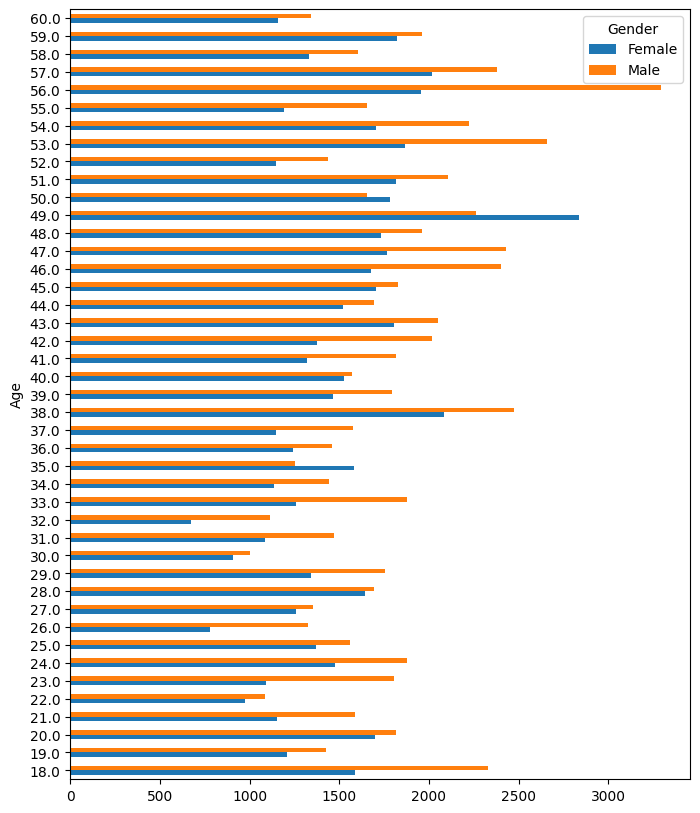

In [343]:
pd.crosstab(data['Age'], data['Gender']).plot(kind='barh', figsize=(8, 10));

In [344]:
# To be continued in further iterations

# Preprocessing and functions

In [345]:
city_counts = data['City'].value_counts()
low_count_cities = city_counts[city_counts < 500].index
low_count_cities

Index(['Mihir', 'Nandini', 'Mahi', 'Vidya', 'City', 'Pratyush', 'Harsha',
       'Saanvi', 'Bhavna', 'Molkata', 'MCA', 'M.Com', 'Atharv', 'Nalini',
       'Keshav', 'Ayush', 'M.Tech', 'Researcher', 'Vaishnavi', 'Chhavi',
       'Parth', 'Vidhi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Ishanabad',
       'Armaan', 'Kagan', 'Kashish', 'Ithal', 'Nalyan', 'Dhruv', 'Galesabad',
       'Itheg', 'Aaradhya', 'Pooja', 'Khushi', 'Khaziabad', 'Jhanvi', 'Kibara',
       'Harsh', 'Reyansh', 'Morena', 'Less Delhi', 'Malyansh', 'Aditya',
       'Plata', 'Aishwarya', '3.0', 'Less than 5 Kalyan', 'Krishna', 'Mira',
       'Moreadhyay', 'Ishkarsh', 'Raghavendra', 'Kashk', 'Gurgaon', 'Tolkata',
       'Anvi', 'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav',
       'Unirar'],
      dtype='object', name='City')

In [346]:
label_cols = ['Gender', 'City', 'Working Professional or Student', 'Profession',
              'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
              'Family History of Mental Illness']

drop_cols = ['Name', 'CGPA']

drop_cols_later = ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction']

low_count_cities = ['Mihir', 'Nandini', 'Mahi', 'Vidya', 'City', 'Pratyush', 'Harsha',
                    'Saanvi', 'Bhavna', 'Molkata', 'MCA', 'M.Com', 'Atharv', 'Nalini',
                    'Keshav', 'Ayush', 'M.Tech', 'Researcher', 'Vaishnavi', 'Chhavi',
                    'Parth', 'Vidhi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Ishanabad',
                    'Armaan', 'Kagan', 'Kashish', 'Ithal', 'Nalyan', 'Dhruv', 'Galesabad',
                    'Itheg', 'Aaradhya', 'Pooja', 'Khushi', 'Khaziabad', 'Jhanvi', 'Kibara',
                    'Harsh', 'Reyansh', 'Morena', 'Less Delhi', 'Malyansh', 'Aditya',
                    'Plata', 'Aishwarya', '3.0', 'Less than 5 Kalyan', 'Krishna', 'Mira',
                    'Moreadhyay', 'Ishkarsh', 'Raghavendra', 'Kashk', 'Gurgaon', 'Tolkata',
                    'Anvi', 'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav',
                    'Unirar']

sleep_values = ['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours']

degree_values = [
    'Class 12', 'B.Ed', 'B.Arch', 'B.Com', 'B.Pharm', 'BCA', 'M.Ed', 'MCA', 
    'BBA', 'BSc', 'MSc', 'LLM', 'M.Pharm', 'M.Tech', 'B.Tech', 'LLB', 
    'BHM', 'MBA', 'BA', 'ME', 'MD', 'MHM', 'BE', 'PhD', 'M.Com', 'MBBS', 'MA'
]

professions_to_keep = [
    "Teacher", "Content Writer", "Architect", "Consultant", "HR Manager",
    "Pharmacist", "Doctor", "Business Analyst", "Entrepreneur", "Chemist",
    "Chef", "Educational Consultant", "Data Scientist", "Researcher", "Lawyer",
    "Customer Support", "Marketing Manager", "Pilot", "Travel Consultant", 
    "Plumber", "Sales Executive", "Manager", "Judge", "Electrician", 
    "Financial Analyst", "Software Engineer", "Civil Engineer", "UX/UI Designer", 
    "Digital Marketer", "Accountant", "Finanancial Analyst", "Mechanical Engineer", 
    "Graphic Designer", "Research Analyst", "Investment Banker", 'Student', 'Working Professional'
]

dietary_habits_to_keep = ["Moderate", "Unhealthy", "Healthy"]

In [347]:
def preprocess_1(data, label_cols, drop_cols, drop_cols_later,
                 low_count_cities, sleep_values, degree_values,
                 professions_to_keep, dietary_habits_to_keep):
    # STAGE 1 PREPROCESSING
    # Dropping the drop cols
    data.drop(drop_cols, axis=1, inplace=True)
    
    # 'Other' to low count cities
    data['City'] = data['City'].apply(lambda x: 'Other' if x in low_count_cities else x)
    
    # Student and Working Professional Imputation if Profession is NaN
    data['Profession'] = data.apply(
    lambda row: 'Student' if pd.isna(row['Profession']) and row['Working Professional or Student'] == 'Student'
    else row['Working Professional or Student'] if pd.isna(row['Profession']) and row['Working Professional or Student'] == 'Working Professional'
    else row['Profession'], axis=1)

    # Handling the 'Other' column in Profession
    data['Profession'] = data['Profession'].apply(lambda x: x if x in professions_to_keep else 'Other')

    # Filling NaN values for Acad and Work Pressure with 0
    data['Academic Pressure'].fillna(0, inplace=True)
    data['Work Pressure'].fillna(0, inplace=True)    
    
    # New Pressure Column
    data['Pressure'] = data['Academic Pressure'] + data['Work Pressure']
    # data.drop(data[data['Pressure'] > 5.0].index, inplace=True)
    
    # Filling NaN Values of Study and Job Satisfaction
    data['Study Satisfaction'].fillna(0, inplace=True)
    data['Job Satisfaction'].fillna(0, inplace=True) 

    # New Satisfaction column
    data['Satisfaction'] = data['Study Satisfaction'] + data['Job Satisfaction']
    # data.drop(data[data['Satisfaction'] > 5.0].index, inplace=True)

    # Dropping the unrequired columns now
    data.drop(drop_cols_later, axis=1, inplace=True)

    # Sleep Duration 'Other' column handling
    data['Sleep Duration'] = data['Sleep Duration'].apply(lambda x: x if x in sleep_values else 'Other')

    # Dietary Habits Column Imputation
    data['Dietary Habits'].fillna(data['Dietary Habits'].mode()[0], inplace=True)

    # Handling the 'Other' column in Dietary Habits
    data['Dietary Habits'] = data['Dietary Habits'].apply(lambda x: x if x in dietary_habits_to_keep else 'Other')
    
    # Degree values 'Other' column handling and mode imputation
    data['Degree'] = data['Degree'].apply(lambda x: x if x in degree_values else 'Other')
    data['Degree'].fillna(data['Degree'].mode()[0], inplace=True)

    # Financial Stress column mode imputation
    data['Financial Stress'].fillna(data['Financial Stress'].mode()[0], inplace=True)

    print("Data Successfully Passed Through Stage 1 Preprocessing....")
    
    return data



def preprocess_2(data, label_cols, training=True, test_data=None):
    if training==True:
        X_train, X_test, y_train, y_test = train_test_split(data.drop('Depression', axis=1), 
                                                            data['Depression'], test_size=0.2,
                                                            stratify=data['Depression'],
                                                            random_state=42)

        for col in label_cols:
            le = LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
        print("Label Encoded Successfully!")
        print("Data Successfully Passed Through Stage 2 Preprocessing....")
        return X_train, X_test, y_train, y_test

    if training==False and test_data is None:
        print("Test Data Missing!")

    if training==False and test_data is not None:
        for col in label_cols:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            # test_data[col] = le.transform(test_data[col])
            test_data[col] = test_data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
            print(f"Label Encoded {col} column.")
        print("Label Encoded Successfully!")
        print("Data Successfully Passed Through Stage 2 Preprocessing....")

        return data, test_data        

In [348]:
data = preprocess_1(data, label_cols, drop_cols, drop_cols_later,
               low_count_cities, sleep_values, degree_values,
               professions_to_keep, dietary_habits_to_keep)

X_train, X_test, y_train, y_test = preprocess_2(data, label_cols, training=True, test_data=None)

Data Successfully Passed Through Stage 1 Preprocessing....
Label Encoded Successfully!
Data Successfully Passed Through Stage 2 Preprocessing....


In [349]:
X_train.head()

,Gender,Age,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Pressure,Satisfaction
id,,,,,,,,,,,,,,
3429,0,25.0,13,0,33,2,1,23,1,8.0,5.0,0,5.0,5.0
57741,0,20.0,5,0,33,0,3,11,0,0.0,1.0,1,3.0,4.0
83234,1,24.0,27,0,33,3,0,1,0,3.0,1.0,1,3.0,2.0
136573,0,38.0,13,1,7,2,1,15,0,10.0,2.0,1,1.0,3.0
93261,0,24.0,1,0,33,3,0,0,1,10.0,3.0,1,4.0,4.0


In [350]:
y_train[:5]

id
3429      1
57741     0
83234     0
136573    0
93261     1
Name: Depression, dtype: int64

In [351]:
X_test.head()

,Gender,Age,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Pressure,Satisfaction
id,,,,,,,,,,,,,,
35156,1,52.0,19,1,12,2,1,15,0,12.0,3.0,1,2.0,3.0
80693,0,21.0,5,1,34,1,1,0,1,0.0,5.0,0,5.0,1.0
24509,1,35.0,14,1,18,1,3,6,0,6.0,1.0,0,5.0,3.0
59701,0,35.0,23,1,34,1,1,22,0,12.0,5.0,1,1.0,3.0
93632,0,30.0,24,0,33,3,3,0,0,9.0,1.0,1,2.0,3.0


In [352]:
y_test.head()

id
35156    0
80693    1
24509    0
59701    0
93632    0
Name: Depression, dtype: int64

# Modelling

In [219]:
models_dict = {
    'Logistic Regression': LogisticRegression(),
    # 'Support Vector Classifier': SVC(),
    # 'Linear Support Vector Classifier': LinearSVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
}

In [220]:
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    
    for model_name, model in models.items():
        # Train the model
        print(f"Trying out model : {model_name}....")
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the results
        results[model_name] = accuracy
        print(f"{model_name} : {accuracy}")
    
    return results

# Assuming X_train, X_test, y_train, y_test are already defined (replace with your dataset)
# Example usage:
results = train_and_evaluate(models_dict, X_train, X_test, y_train, y_test)

# Print out the accuracy of each model
print("********* RESULTS *********")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

Trying out model : Logistic Regression....
Logistic Regression : 0.9360341151385928
Trying out model : Decision Tree Classifier....
Decision Tree Classifier : 0.902452025586354
Trying out model : Random Forest Classifier....
Random Forest Classifier : 0.9363539445628998
Trying out model : Gradient Boosting Classifier....
Gradient Boosting Classifier : 0.937455579246624
Trying out model : XGBoost....
XGBoost : 0.9360341151385928
Trying out model : LightGBM....
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20454, number of negative: 92106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 190
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 14
[LightGBM] [Info] [binary:BoostF

# Catboost Optuna

In [ ]:
def objective(trial):
    # Suggest hyperparameters for CatBoost
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 10.0),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.6, 1.0),
        'random_strength': trial.suggest_int('random_strength', 1, 10),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 1),
        'max_bin': trial.suggest_int('max_bin', 100, 500),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'verbose': 0
    }

    # Initialize and train the CatBoost model
    model = CatBoostClassifier(**params)
    
    # Fit the model (training only on the training data)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model using accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create an Optuna study to maximize accuracy
study = optuna.create_study(direction='maximize')

# Initialize tqdm progress bar
n_trials = 100
progress_bar = tqdm(range(n_trials), desc="Optuna Trials")

# Optimization with tqdm progress bar
for _ in progress_bar:
    study.optimize(objective, n_trials=1)  # Run a single trial
    best_trial = study.best_trial
    progress_bar.set_postfix(
        accuracy=f"{best_trial.value:.4f}",
        trial=best_trial.number
    )

# After optimization
best_trial = study.best_trial

print(f"Best trial: {best_trial.number}")
print(f"Best parameters: {best_trial.params}")
print(f"Best accuracy: {best_trial.value:.4f}")

In [ ]:
# Best trial: 98
# Best parameters: {'iterations': 570, 'depth': 5, 'learning_rate': 0.05393369060950916, 
# 'l2_leaf_reg': 0.2653852384379592, 'subsample': 0.8394332408612025, 
# 'colsample_bylevel': 0.7468231714613978, 'random_strength': 5, 
# 'bagging_temperature': 0.5771873572624784, 'max_bin': 349, 'grow_policy': 'SymmetricTree'}
# Best accuracy: 0.9404

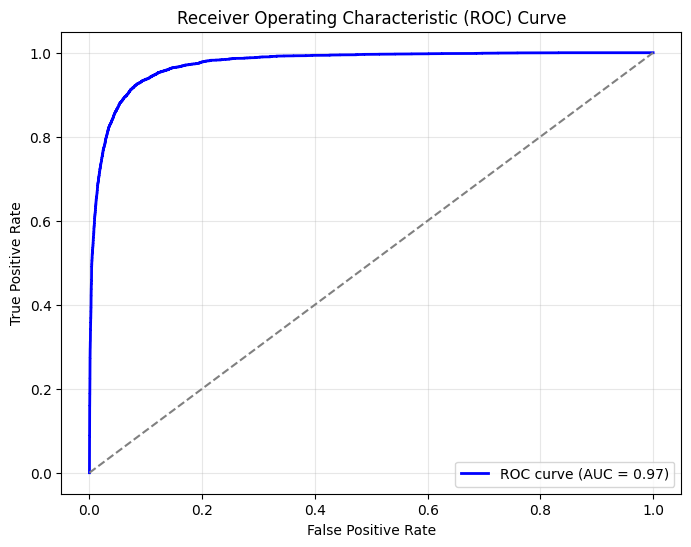

In [105]:
cat_params = {'iterations': 570, 'depth': 5, 'learning_rate': 0.05393369060950916, 
              'l2_leaf_reg': 0.2653852384379592, 'subsample': 0.8394332408612025, 
              'colsample_bylevel': 0.7468231714613978, 'random_strength': 5, 
              'bagging_temperature': 0.5771873572624784, 'max_bin': 349, 'grow_policy': 'SymmetricTree',
              'verbose':0}
model = CatBoostClassifier(**cat_params)

model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]  # Get the probability for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [106]:
from sklearn.metrics import accuracy_score
y_preds = model.predict(X_test)
accuracy_score(y_test, y_preds)

0.9395522388059702

In [107]:
y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Calculate F1-scores for all thresholds
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the threshold that gives the best F1-score
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F1-Score: {f1_scores[best_threshold_index]:.4f}")

# Use this threshold for predictions
y_pred_best = (y_proba >= best_threshold).astype(int)

Best Threshold: 0.4838
Best F1-Score: 0.8322


In [108]:
accuracy_score(y_pred_best, y_test)

0.9397654584221748

## Feature Importances acc to CatBoost best params

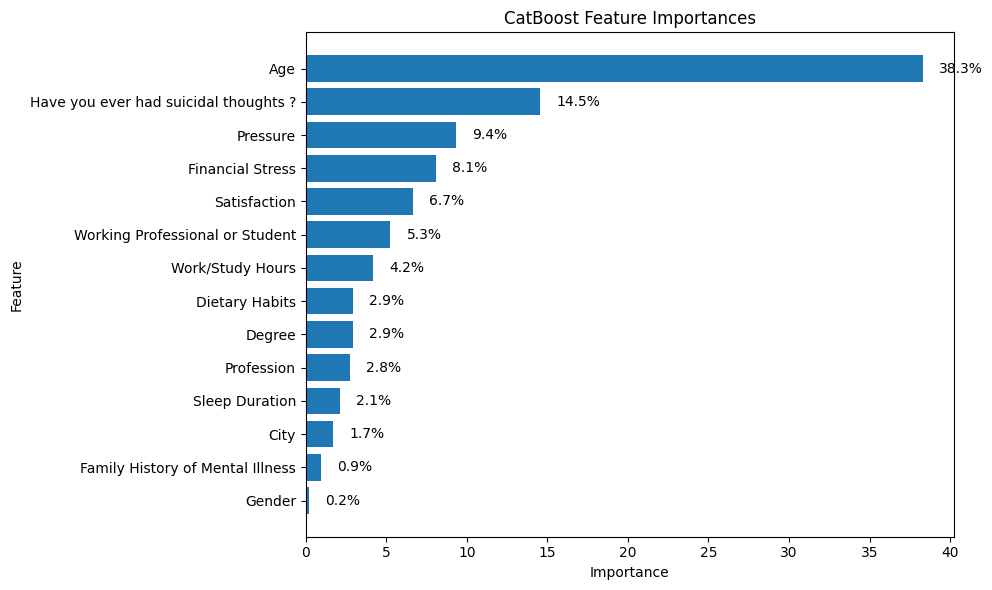

In [109]:
feature_importances = model.get_feature_importance()
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Calculate the percentage of importance
feature_importance_df['Percentage'] = (feature_importance_df['Importance'] / 
                                       feature_importance_df['Importance'].sum()) * 100

# Plot feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importances')
plt.gca().invert_yaxis()  # Reverse the order for better visualization

# Annotate the percentages on the bars
for bar, percentage in zip(bars, feature_importance_df['Percentage']):
    plt.text(
        bar.get_width() + 1,  # Position the text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically
        f'{percentage:.1f}%',  # Format the percentage
        va='center'  # Vertical alignment
    )

plt.tight_layout()
plt.show()

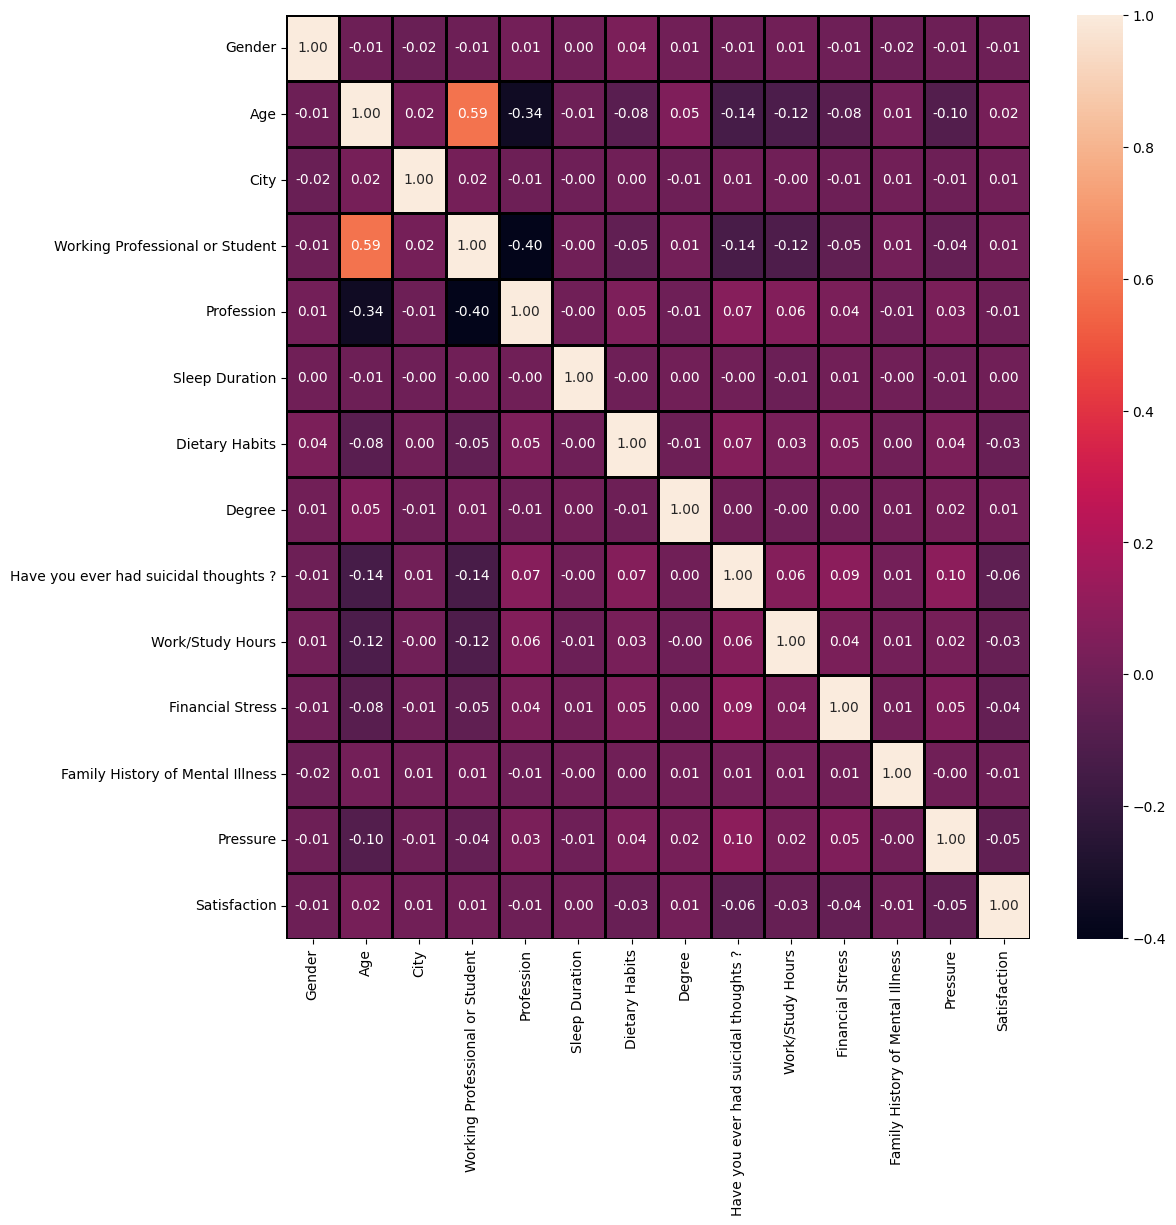

In [110]:
plt.figure(figsize=(12, 12))
sns.heatmap(X_train.corr(), annot=True, linewidths=2, fmt=".2f", linecolor="black");

In [111]:
corrmap = X_train
corrmap['Depression'] = y_train

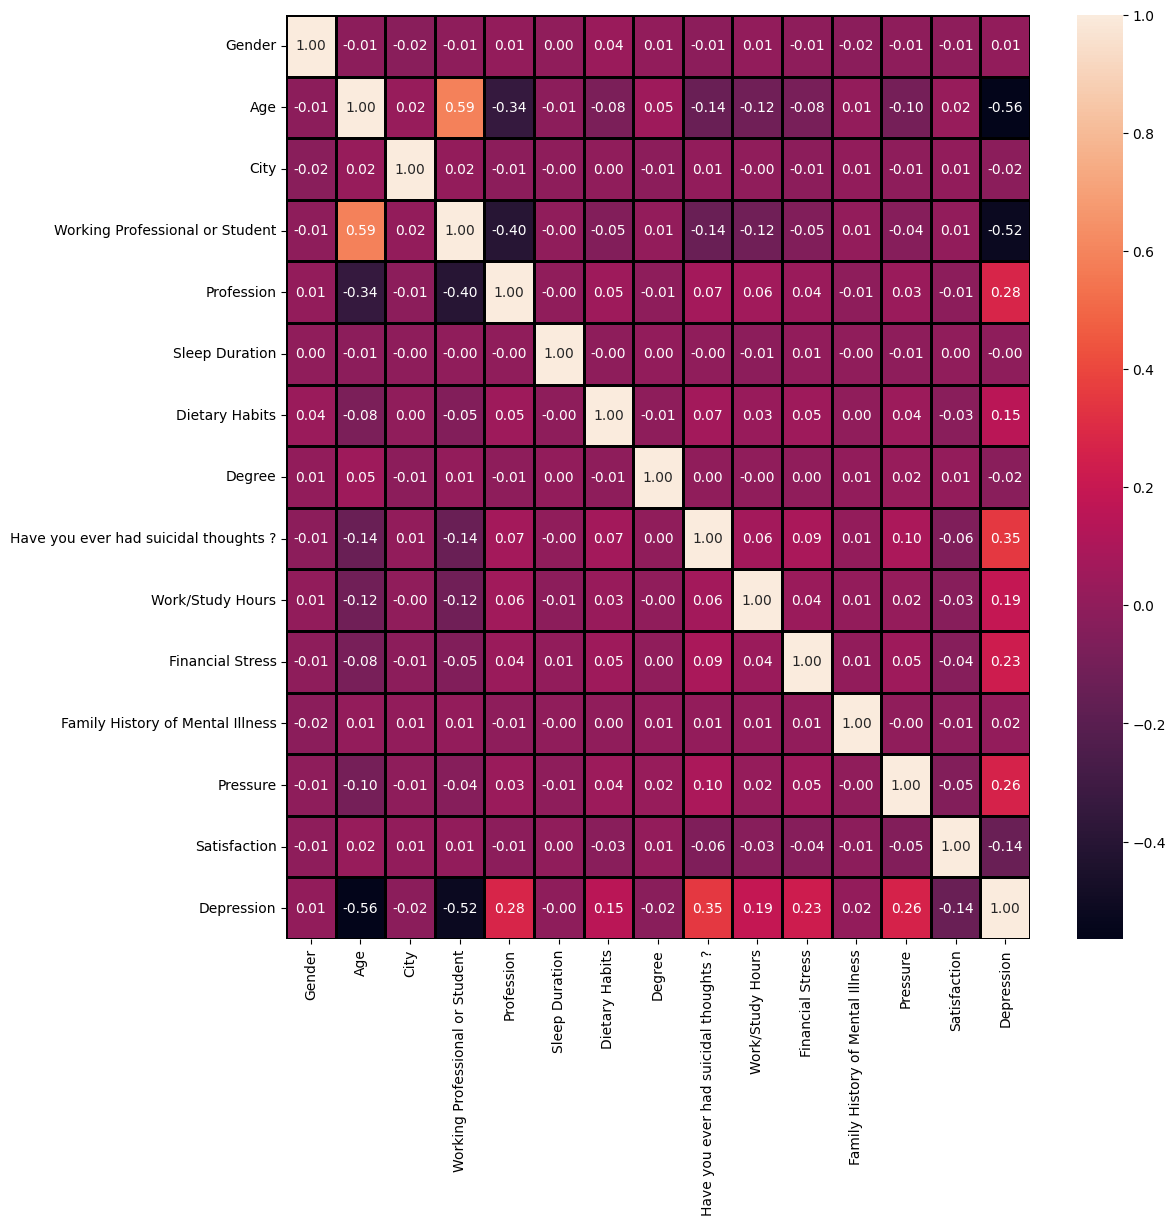

In [112]:
plt.figure(figsize=(12, 12))
sns.heatmap((corrmap).corr(), annot=True, linewidths=2, fmt=".2f", linecolor="black");

1
2


100%|===================| 9999/10000 [04:01<00:00]        

3


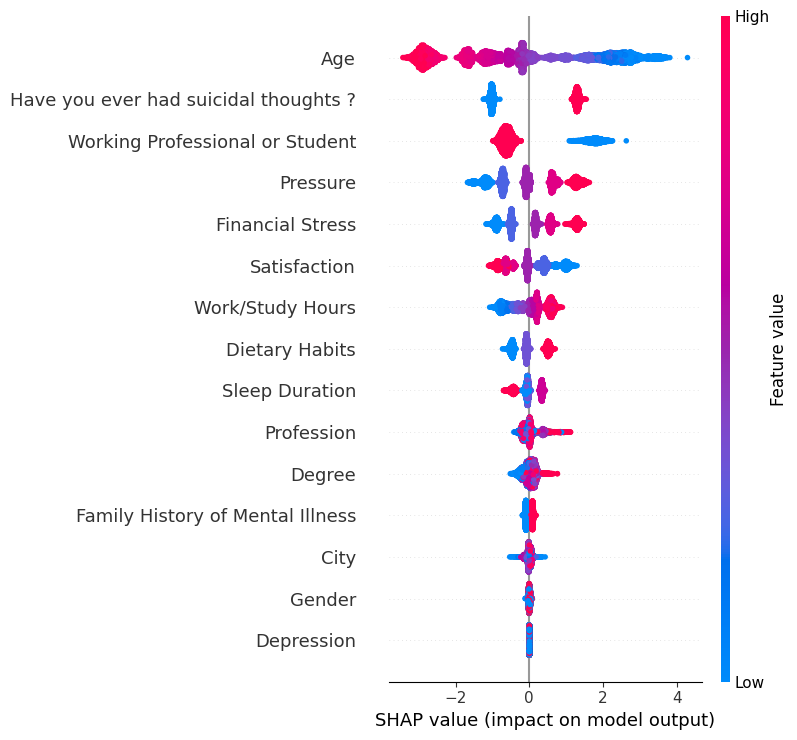

In [113]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

print("1")
explainer = shap.Explainer(model, X_train)
print("2")
shap_values = explainer(X_train[:10000])
print("3")
shap.summary_plot(shap_values, X_train[:10000])
# print("4")
# shap.summary_plot(shap_values, X_train, plot_type="dot")
# print("5")
# shap.force_plot(explainer.expected_value, shap_values[0].values, X_train.iloc[0])
# print("6")
# shap.dependence_plot("Age", shap_values.values, X_train)

## Some decisions with CatBoost Feature Importance

In [115]:
# additional_drop_cols = ['Gender', 'Family History of Mental Illness', 'City',] #'Sleep Duration']
# # additional_drop_cols = ['Working Professional or Student']
# # additional_drop_cols = []

# cat_X_train = X_train.drop(additional_drop_cols, axis=1)
# cat_X_test = X_test.drop(additional_drop_cols, axis=1)

# model.fit(cat_X_train, y_train)

# y_pred = model.predict(cat_X_test)

# accuracy_score(y_test, y_pred)

# LightGBM Optuna

In [ ]:
def objective(trial):
    # Define hyperparameter space
    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "boosting_type": "gbdt",
        "verbosity": -1,
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "n_estimators": trial.suggest_int("n_estimators", 50, 1000),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),
    }

    # Train LightGBM model
    model = lgb.LGBMClassifier(**params)
    model.fit(
        X_train,
        y_train,
    )

    # Predict and evaluate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create and run Optuna study
study = optuna.create_study(direction="maximize")
n_trials = 200  # Number of trials
with tqdm(total=n_trials) as pbar:
    for _ in range(n_trials):
        study.optimize(objective, n_trials=1, catch=(Exception,))
        pbar.update(1)

# Best hyperparameters
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", study.best_value)

In [ ]:
# Best Hyperparameters: {'max_depth': 3, 'num_leaves': 116, 'learning_rate': 0.05569317116124248, 'n_estimators': 802, 'min_child_samples': 49, 'subsample': 0.653028558556148, 'colsample_bytree': 0.6429914727484914, 'reg_alpha': 3.309699571964392, 'reg_lambda': 2.8398831531459106}
# Best Accuracy: 0.9397654584221748

# XGBoost Optuna

In [221]:
def objective(trial):
    # Define hyperparameter space
    params = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": "gbtree",
        "verbosity": 0,
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "n_estimators": trial.suggest_int("n_estimators", 50, 1000),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 10.0),
        "lambda": trial.suggest_float("lambda", 0.0, 10.0),
        "alpha": trial.suggest_float("alpha", 0.0, 10.0),
    }

    # Train XGBoost model
    model = xgb.XGBClassifier(**params, use_label_encoder=False)
    model.fit(X_train, y_train)

    # Predict and evaluate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create and run Optuna study
study = optuna.create_study(direction="maximize")
n_trials = 200  # Number of trials
with tqdm(total=n_trials) as pbar:
    for _ in range(n_trials):
        study.optimize(objective, n_trials=1, catch=(Exception,), n_jobs=-1)
        pbar.update(1)

# Best hyperparameters
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", study.best_value)

[I 2024-11-22 13:51:32,562] A new study created in memory with name: no-name-8787b37e-c058-4235-beb3-45ce007ac8bf
100%|██████████| 200/200 [17:33<00:00,  5.27s/it]

Best Hyperparameters: {'max_depth': 3, 'learning_rate': 0.07023134710740099, 'n_estimators': 786, 'min_child_weight': 3.684069546040244, 'subsample': 0.7500998141204464, 'colsample_bytree': 0.9665665062916122, 'gamma': 1.977567154692796, 'lambda': 4.780930671750285, 'alpha': 2.429036216441175}
Best Accuracy: 0.9399431414356787


In [222]:
# Best Hyperparameters: {'max_depth': 3, 'learning_rate': 0.07023134710740099, 
# 'n_estimators': 786, 'min_child_weight': 3.684069546040244, 'subsample': 0.7500998141204464, 
# 'colsample_bytree': 0.9665665062916122, 'gamma': 1.977567154692796, 'lambda': 4.780930671750285, 
# 'alpha': 2.429036216441175}
# Best Accuracy: 0.9399431414356787

# Stacking Classifier

In [237]:
cat_params = {'iterations': 570, 'depth': 5, 'learning_rate': 0.05393369060950916, 
              'l2_leaf_reg': 0.2653852384379592, 'subsample': 0.8394332408612025, 
              'colsample_bylevel': 0.7468231714613978, 'random_strength': 5, 
              'bagging_temperature': 0.5771873572624784, 'max_bin': 349, 'grow_policy': 'SymmetricTree',
              'verbose':1}

lgb_params = {'max_depth': 3, 'num_leaves': 116, 'learning_rate': 0.05569317116124248,
              'n_estimators': 802, 'min_child_samples': 49, 'subsample': 0.653028558556148, 
              'colsample_bytree': 0.6429914727484914, 'reg_alpha': 3.309699571964392,
              'reg_lambda': 2.8398831531459106, 'verbosity':1}

xgb_params = {'max_depth': 3, 'learning_rate': 0.07023134710740099, 
              'n_estimators': 786, 'min_child_weight': 3.684069546040244, 'subsample': 0.7500998141204464, 
              'colsample_bytree': 0.9665665062916122, 'gamma': 1.977567154692796, 'lambda': 4.780930671750285, 
              'alpha': 2.429036216441175, 'verbosity':1}

In [239]:
cat_model = CatBoostClassifier(**cat_params)
lgb_model = LGBMClassifier(**lgb_params)
xgb_model = XGBClassifier(**xgb_params)

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(
    estimators=[
        ('cat', cat_model),
        ('lgb', lgb_model),
        ('xgb', xgb_model)
    ],
    final_estimator=meta_model
)

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")

0:	learn: 0.6056522	total: 16.3ms	remaining: 9.28s
1:	learn: 0.5319720	total: 33.3ms	remaining: 9.47s
2:	learn: 0.4801710	total: 49.6ms	remaining: 9.37s
3:	learn: 0.4423559	total: 65.8ms	remaining: 9.3s
4:	learn: 0.4042478	total: 83ms	remaining: 9.38s
5:	learn: 0.3689696	total: 99.5ms	remaining: 9.35s
6:	learn: 0.3420561	total: 117ms	remaining: 9.41s
7:	learn: 0.3193619	total: 134ms	remaining: 9.41s
8:	learn: 0.2988814	total: 151ms	remaining: 9.4s
9:	learn: 0.2817912	total: 168ms	remaining: 9.41s
10:	learn: 0.2675184	total: 184ms	remaining: 9.37s
11:	learn: 0.2585309	total: 203ms	remaining: 9.42s
12:	learn: 0.2482472	total: 220ms	remaining: 9.43s
13:	learn: 0.2440963	total: 234ms	remaining: 9.28s
14:	learn: 0.2361038	total: 253ms	remaining: 9.36s
15:	learn: 0.2293924	total: 270ms	remaining: 9.34s
16:	learn: 0.2229733	total: 286ms	remaining: 9.31s
17:	learn: 0.2194229	total: 302ms	remaining: 9.27s
18:	learn: 0.2147823	total: 317ms	remaining: 9.21s
19:	learn: 0.2109642	total: 335ms	remai

# Test data

In [353]:
test_data = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv').set_index('id')
test_data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,,
140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [354]:
test_data = preprocess_1(test_data, label_cols,
    drop_cols,
    drop_cols_later,
    low_count_cities,
    sleep_values,
    degree_values,
    professions_to_keep,
    dietary_habits_to_keep,)

data, test_data = preprocess_2(data, label_cols, training=False, test_data=test_data)

Data Successfully Passed Through Stage 1 Preprocessing....
Label Encoded Gender column.
Label Encoded City column.
Label Encoded Working Professional or Student column.
Label Encoded Profession column.
Label Encoded Sleep Duration column.
Label Encoded Dietary Habits column.
Label Encoded Degree column.
Label Encoded Have you ever had suicidal thoughts ? column.
Label Encoded Family History of Mental Illness column.
Label Encoded Successfully!
Data Successfully Passed Through Stage 2 Preprocessing....


In [355]:
# test_data.drop(additional_drop_cols, axis=1, inplace=True)
# data.drop(additional_drop_cols, axis=1, inplace=True)

In [356]:
test_data.head()

,Gender,Age,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Pressure,Satisfaction
id,,,,,,,,,,,,,,
140700,1,53.0,30,1,20,2,1,12,0,9.0,3.0,1,2.0,5.0
140701,0,58.0,13,1,12,2,1,2,0,6.0,4.0,0,2.0,4.0
140702,1,53.0,10,1,34,1,1,0,1,12.0,4.0,0,4.0,1.0
140703,0,23.0,23,0,33,3,1,10,1,10.0,4.0,0,5.0,1.0
140704,1,47.0,11,1,34,1,1,7,1,3.0,4.0,0,5.0,5.0


In [357]:
data.head()

,Gender,Age,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
id,,,,,,,,,,,,,,,
0,0,49.0,15,1,3,3,0,9,0,1.0,2.0,0,0,5.0,2.0
1,1,26.0,28,1,34,2,3,12,1,7.0,3.0,0,1,4.0,3.0
2,1,33.0,30,0,33,0,0,3,1,3.0,1.0,0,1,5.0,2.0
3,1,22.0,17,1,34,2,1,6,1,10.0,1.0,1,1,5.0,1.0
4,0,30.0,12,1,2,0,3,6,1,9.0,4.0,1,0,1.0,1.0


In [ ]:
cat_params = {'iterations': 570, 'depth': 5, 'learning_rate': 0.05393369060950916, 
              'l2_leaf_reg': 0.2653852384379592, 'subsample': 0.8394332408612025, 
              'colsample_bylevel': 0.7468231714613978, 'random_strength': 5, 
              'bagging_temperature': 0.5771873572624784, 'max_bin': 349, 'grow_policy': 'SymmetricTree',
              'verbose':0}
model = CatBoostClassifier(**cat_params)

print("Fitting the model....")
model.fit(data.drop('Depression', axis=1), data['Depression'])

print("Predicting on test data....")
preds = model.predict(test_data)
pred_prob = model.predict_proba(test_data)

In [ ]:
lgb_params = {'max_depth': 3, 'num_leaves': 116, 'learning_rate': 0.05569317116124248,
              'n_estimators': 802, 'min_child_samples': 49, 'subsample': 0.653028558556148, 
              'colsample_bytree': 0.6429914727484914, 'reg_alpha': 3.309699571964392,
              'reg_lambda': 2.8398831531459106}
model = lgb.LGBMClassifier(**lgb_params)

print("Fitting the model....")
model.fit(data.drop('Depression', axis=1), data['Depression'])

print("Predicting on test data....")
preds = model.predict(test_data)
pred_prob = model.predict_proba(test_data)

In [228]:
xgb_params = {'max_depth': 3, 'learning_rate': 0.07023134710740099, 
              'n_estimators': 786, 'min_child_weight': 3.684069546040244, 'subsample': 0.7500998141204464, 
              'colsample_bytree': 0.9665665062916122, 'gamma': 1.977567154692796, 'lambda': 4.780930671750285, 
              'alpha': 2.429036216441175}
model = xgb.XGBClassifier(**xgb_params)

print("Fitting the model....")
model.fit(data.drop('Depression', axis=1), data['Depression'])

print("Predicting on test data....")
preds = model.predict(test_data)
pred_prob = model.predict_proba(test_data)

Fitting the model....
Predicting on test data....


In [358]:
stacking_clf.fit(data.drop('Depression', axis=1), data['Depression'])
print("Predicting on Test Data....")
y_pred = stacking_clf.predict(test_data)
print("Done:p")

0:	learn: 0.6059331	total: 23.9ms	remaining: 13.6s
1:	learn: 0.5399347	total: 44.2ms	remaining: 12.5s
2:	learn: 0.4881794	total: 61.7ms	remaining: 11.7s
3:	learn: 0.4428639	total: 84.5ms	remaining: 12s
4:	learn: 0.4031580	total: 105ms	remaining: 11.8s
5:	learn: 0.3712892	total: 126ms	remaining: 11.8s
6:	learn: 0.3452021	total: 146ms	remaining: 11.8s
7:	learn: 0.3203180	total: 166ms	remaining: 11.7s
8:	learn: 0.3002635	total: 185ms	remaining: 11.6s
9:	learn: 0.2851879	total: 205ms	remaining: 11.5s
10:	learn: 0.2712235	total: 228ms	remaining: 11.6s
11:	learn: 0.2591794	total: 250ms	remaining: 11.6s
12:	learn: 0.2495940	total: 270ms	remaining: 11.6s
13:	learn: 0.2425768	total: 291ms	remaining: 11.5s
14:	learn: 0.2354233	total: 310ms	remaining: 11.5s
15:	learn: 0.2294332	total: 329ms	remaining: 11.4s
16:	learn: 0.2244726	total: 348ms	remaining: 11.3s
17:	learn: 0.2186634	total: 371ms	remaining: 11.4s
18:	learn: 0.2146655	total: 391ms	remaining: 11.3s
19:	learn: 0.2111835	total: 409ms	remai

In [359]:
y_pred[:5]

array([0, 0, 0, 1, 0])

# Submission File

## Default threshold

In [360]:
sub = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')
sub['Depression'] = y_pred

sub.to_csv('Submission_stacked_default.csv', index=False)
sub.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0


In [361]:
sub['Depression'].value_counts()

Depression
0    77796
1    16004
Name: count, dtype: int64

## 0.3833, 0.4279, 0.4838 (ROC) Threshold

In [232]:
positive_probs = pred_prob[:, 1]

# Apply the threshold
# best_threshold = 0.3833

# best_threshold = 0.4279
best_threshold = 0.4838
y_pred_best = (positive_probs >= best_threshold).astype(int)

# Output predictions for the first 5 samples
print("Predicted probabilities for the positive class:", positive_probs[:5])
print("Predicted labels with threshold 0.4279:", y_pred_best[:5])

Predicted probabilities for the positive class: [6.9214578e-04 1.5800052e-04 1.2356353e-02 9.8508692e-01 1.8172372e-02]
Predicted labels with threshold 0.4279: [0 0 0 1 0]


In [233]:
sub = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')
sub['Depression'] = y_pred_best

sub.to_csv('Submission_xgb_2.csv', index=False)
sub.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
